In [6]:
# coding: utf-8
#!/usr/bin/python2
import nltk
import os
import codecs
import argparse
import numpy as np
import string
import re
from pyvi import ViTokenizer
import gensim # In case you have difficulties installing gensim, you need to consider installing conda.
from gensim.models.callbacks import CallbackAny2Vec
import pickle as pickle




In [7]:
pattern = r'[' + string.punctuation +']'

In [8]:
# arguments setting 

lcode = "vi"
vector_size = 300
window_size = 5
vocab_size = 40000
num_negative = 5
epochs = 5

        
class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0
        self.losses = []

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))
        self.epoch += 1
        self.losses.append(loss_now)
        
        
def get_min_count(sents):
    '''
    Args:
      sents: A list of lists. E.g., [["I", "am", "a", "boy", "."], ["You", "are", "a", "girl", "."]]
     
    Returns:
      min_count: A uint. Should be set as the parameter value of word2vec `min_count`.   
    '''
    global vocab_size
    from itertools import chain
     
    fdist = nltk.FreqDist(chain.from_iterable(sents))
    min_count = fdist.most_common(vocab_size)[-1][1] # the count of the the top-kth word
    
    return min_count

def make_wordvectors():
    global lcode
    
     
    print ("Making sentences as list...")
    sents = []
    with codecs.open('data/corpus/corpus-split-2.txt', 'r', 'utf-8') as fin:
        while 1:
            line = fin.readline()
            line = re.sub(pattern, '', line)
            if not line: break
            
            words = ViTokenizer.tokenize(line)
            words = words.split()
            sents.append(words)

    print ("Making word vectors...")   
    min_count = get_min_count(sents)

    model = gensim.models.Word2Vec(sents, size=vector_size, min_count=min_count,
                                   negative=num_negative, 
                                   window=window_size,
                                   callbacks=[callback()],
                                   compute_loss=True,
                                   iter=epochs)

    # Save vector to file
    model.wv.save_word2vec_format('data/vectors/{}-{}-{}-{}-{}-wiki.vec'.format(lcode, vector_size, window_size, vocab_size, num_negative), binary=False)
    
    # Save to file

    with codecs.open('data/vectors/{}-{}-{}-{}-{}-wiki.tsv'.format(lcode, vector_size, window_size, vocab_size, num_negative), 'w', 'utf-8') as fout:
        for i, word in enumerate(model.wv.index2word):
            fout.write(u"{}{}\n".format(word.encode('utf8').decode('utf8'),
                                              np.array_str(model[word])[1:-1]
                                              ))



In [9]:
#if __name__ == "__main__":
    #make_wordvectors()
    
    #print ("Done")

In [10]:
global lcode
print ("Making sentences as list...")
sents = []
with codecs.open('data/corpus/corpus-split-2.txt', 'r', 'utf-8-sig') as fin:
    while 1:
        line = fin.readline()
        line = re.sub(pattern, '', line)
        if not line: break

        words = ViTokenizer.tokenize(line)
        words = words.split()
        sents.append(words)
        
print ("Done making sentence list")

Making sentences as list...
Done making sentence list


In [ ]:
min_count = get_min_count(sents)
print ("Done getting min_count ")

In [30]:
print(min_count)

813


In [11]:

print ("Making word vectors...")   

call_back = callback()

model = gensim.models.Word2Vec(sents, size=vector_size, min_count=300,
                               negative=num_negative, 
                               window=window_size,
                               callbacks=[call_back],
                               compute_loss=True,
                               sg = 1,
                               iter=5)

# Save vector to file
model.wv.save_word2vec_format('data/vectors-sg/{}-{}-{}-{}-{}-fullsplit-sg-token.vec'.format(lcode, vector_size, window_size, vocab_size, num_negative), binary=False)

# Save to file
with codecs.open('data/vectors-sg/{}-{}-{}-{}-{}-fullsplit-sg.tsv'.format(lcode, vector_size, window_size, vocab_size, num_negative), 'w', 'utf-8') as fout:
    for i, word in enumerate(model.wv.index2word):
        fout.write(u"{}{}\n".format(word.encode('utf8').decode('utf8'),
                                          np.array_str(model[word])[1:-1]
                                          ))
print ("Done.")


Making word vectors...
Loss after epoch 0: 115149016.0
Loss after epoch 1: 19068712.0
Loss after epoch 2: 0.0
Loss after epoch 3: 0.0
Loss after epoch 4: 0.0


C:\Users\lego2\anaconda3\envs\python36-clone-GUI\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


Done.


In [12]:
print(call_back.losses)

[115149016.0, 19068712.0, 0.0, 0.0, 0.0]


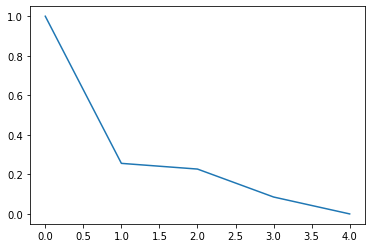

In [6]:
import matplotlib.pyplot as plt
norm = [float(i)/max(call_back.losses) for i in call_back.losses]
plt.plot(norm)

In [45]:
model.wv.most_similar('chó')

[('mèo', 0.7437734603881836),
 ('Chó', 0.6891762018203735),
 ('cún', 0.6208145022392273),
 ('trăn', 0.6190840005874634),
 ('chú', 0.6027079820632935),
 ('khỉ', 0.5978633165359497),
 ('rọ_mõm', 0.5733259320259094),
 ('rông', 0.5680913925170898),
 ('cá_sấu', 0.5509471893310547),
 ('thú', 0.5485297441482544)]

In [38]:
vec = (model.wv['Việt_Nam'] - model.wv['Hà_Nội'] + model.wv['Pháp'])
model.wv.most_similar([vec])


[('Pháp', 0.6792606115341187),
 ('Việt_Nam', 0.6028338670730591),
 ('Italy', 0.5652343034744263),
 ('Italia', 0.5627124309539795),
 ('Ba_Lan', 0.5491852760314941),
 ('Việt_nam', 0.5216754674911499),
 ('Séc', 0.5115406513214111),
 ('Bỉ', 0.5109589099884033),
 ('Romania', 0.5092589855194092),
 ('Nhật_Bản', 0.5036190152168274)]

In [18]:
sentences


[['Hàng',
  'chục',
  'ngàn',
  'phương_tiện',
  'bị',
  'ghi_hình',
  'vi',
  'phạm_luật',
  'giao_thông',
  'ở',
  'TPHCM',
  'bị',
  'bêu',
  'tên',
  'nhưng',
  'chủ',
  'vẫn',
  'không',
  'chịu',
  'nộp',
  'phạt'],
 ['Trên',
  'cổng',
  'thông_tin',
  'điện_tử',
  'của',
  'Công_an',
  'TPHCM',
  'CATP',
  'mục',
  'thông_tin',
  'về',
  'phương_tiện',
  'vi_phạm',
  'hành_chính',
  'qua',
  'hình_ảnh',
  'từ',
  'ngày',
  '412017',
  '412018',
  'có',
  'ghi_nhận',
  'biển',
  'số',
  'xe',
  'lỗi',
  'vi_phạm',
  'ngày',
  'vi_phạm',
  'của',
  '34118',
  'phương_tiện',
  'ô_tô',
  'chưa',
  'nộp',
  'phạt'],
 ['Đây',
  'là',
  'các',
  'phương_tiện',
  'vi_phạm',
  'được',
  'camera',
  'di_động',
  'hoặc',
  'cố_định',
  'của',
  'CATP',
  'ghi_hình_phạt',
  'nguội'],
 ['Điều',
  'đáng',
  'nói',
  'dù',
  'Phòng',
  'CSGT',
  'đường_bộ',
  'đường_sắt',
  'PC67',
  'CATP',
  'nhiều',
  'lần',
  'gửi',
  'giấy',
  'thông_báo',
  'vi_phạm',
  'về',
  'công_an',
  'địa_phương',